In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
points = [[0, 5.5], [1, 6], [2.5, 6.5], [3.5, 7], [4.5, 7.5], [6, 8], [7.5, 8.5], [9, 9], [11.9, 9.5], [14.3, 10]]

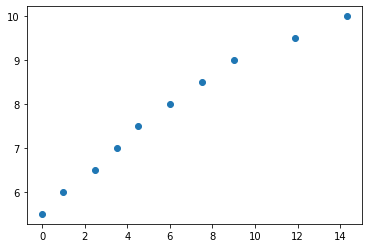

In [6]:
plt.scatter([p[0] for p in points],[p[1] for p in points])
plt.show()

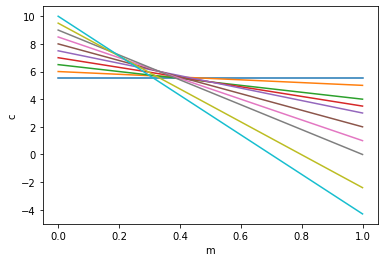

In [22]:
# MC plot
# y=mx+c, c=y-mx
def plotline(p, domain=(0,1), range=(0,10)):
    m = np.linspace(*domain,100)
    c = p[1]-p[0]*m
    plt.plot(m,c)
for p in points:
    plotline(p)
plt.xlabel('m')
plt.ylabel('c')
plt.show()

JPEG
(1024, 635)
RGB


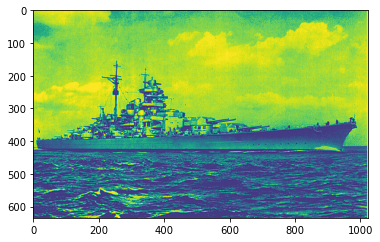

In [25]:
from PIL import Image
image = Image.open('bismarck.jpg')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()
data = np.array(image.convert('L'))
plt.imshow(data)
plt.show()

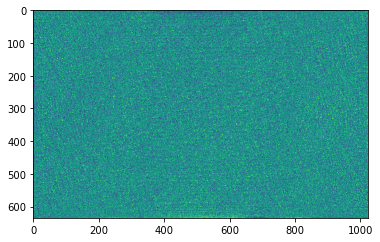

In [33]:
fft = np.fft.fft2(data)
plt.imshow(np.angle(fft))

In [ ]:
def calculate_2D_fft(input):
    ft = np.fft.ifftshift(input, axes=(0,1))
    ft = np.fft.fft2(ft, axes=(0,1))
    return np.fft.fftshift(ft, axes=(0,1))
def calculate_2D_ifft(input):
    ift = np.fft.ifftshift(input, axes=(0,1))
    ift = np.fft.ifft2(ift, axes=(0,1))
    ift = np.fft.fftshift(ift, axes=(0,1))
    return ift.real
def reconstruct_img(fmap):
    '''
    fmap: array [Height, Width, channels]
    '''
    h, w, _ = fmap.shape
    # print(fmap.shape)
    # generate the centre of the frequency map
    centre = [int((h-1)/2), int((w-1)/2)]
    # generate the half left x and y coordinate
    coords_left_half = (
    (x, y) for x in range(h) for y in range(int((w-1)/2)+1))
    # sort the coordinate based on the distance to centre (from close to far away)
    coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre))
    # initialize the matrix to store the intensity from each frequency
    rec_image = np.zeros(fmap.shape)
    # initialize the matrix to store the frequency (complex type for magnitude and phase o
    individual_grating = np.zeros(fmap.shape, dtype="complex")
    idx = 0
    for coords in coords_left_half:
        # Central column: only include if points in top half of
        # the central column
        # Reconstruct image from low frequency component to high frequency component (cent
        if not (coords[1] == centre[1] and coords[0] > centre[0]):
            idx += 1
            symm_coords = find_symmetric_coordinates(coords, centre)
            # Copy values from Fourier transform into
            # individual_grating for the pair of points in
            # current iteration
            individual_grating[coords[0], coords[1], :] = fmap[coords[0], coords[1], :]
            individual_grating[symm_coords[0], symm_coords[1], :] = fmap[symm_coords[0], symm_coords[1]]
            # Calculate inverse Fourier transform to give the
            # reconstructed grating. Add this reconstructed
            # grating to the reconstructed image
            rec_grating = calculate_2D_ifft(individual_grating)
            rec_image += rec_grating
            # Clear individual_grating array, ready for
            # next iteration
            individual_grating[coords] = 0
            individual_grating[symm_coords] = 0
    return rec_image
def HP_filter(fmap, ws):
    '''
    fmap: array [Height, Width, channels]
    ws: scale value. window size
    '''
    h, w, _ = fmap.shape
    (c_h, c_w) = (int(h/2), int(w/2))
    F = fmap.copy()
    for i in range(h):
        for j in range(w):
            # Distance from centre is √(x^2 + y^2)
            if np.sqrt((i - c_h)**2 + (j - c_w)**2) < ws:
                F[i, j, :] = 0
    return F
def LP_filter(fmap, ws):
    '''
    fmap: array [Height, Width, channels]
    ws: scale value. window size
    '''
    h, w, _ = fmap.shape
    (c_h, c_w) = (int(h/2), int(w/2))
    F = fmap.copy()
    for i in range(h):
        for j in range(w):
            # Distance from centre is √(x^2 + y^2)
            if np.sqrt((i - c_h)**2 + (j - c_w)**2) > ws:
                F[i, j, :] = 0
    return F
    # Below functions used in reconstruction
def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
    (coords[0] - centre[0]) ** 2 + (coords[1] - centre[1]) ** 2)
def find_symmetric_coordinates(coords, centre):
    # generate the symmetric coordinate
    return (centre[0] + (centre[0] - coords[0]),centre[1] + (centre[1] - coords[1]))
fmap = calculate_2D_fft(img)
rec_img = reconstruct_img(fmap)
